In [2]:
import requests
import json
import concurrent.futures
import matplotlib.pyplot as plt

In [3]:
redisChargeUrl = 'https://6flvfinpb7.execute-api.us-east-1.amazonaws.com/prod/charge-request-redis'
redisResetUrl = 'https://6flvfinpb7.execute-api.us-east-1.amazonaws.com/prod/reset-redis'
memcachedChargeUrl = 'https://pvnm4n5nlc.execute-api.us-east-1.amazonaws.com/prod/charge-request-memcached'
memcachedResetUrl = 'https://pvnm4n5nlc.execute-api.us-east-1.amazonaws.com/prod/reset-memcached'



In [64]:
def plot_distribution(data, cache):
    plt.hist(data, bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel('Check Balance Time is ms')
    plt.ylabel('Frequency')
    plt.title('Distribution Chart for '+ cache)
    plt.grid(True)
    plt.show()

def create_pie_chart(data_dict, cache):
    labels = list(data_dict.keys())
    values = list(data_dict.values())

    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Pie Chart of check balance time for '+ cache)
    plt.show()



def testIt(ChargeUrl, resetUrl):

    response = requests.post(ChargeUrl)
    if response.status_code==200:
        if response.json()['isAuthorized']:
            return response.json()['checkBalanceTimeTaken']
        else:
            requests.post(resetUrl)
            return None
    else:
        pass
    
finalResultsRedis = []
finalResultsMemcached = []

## Ran the below block about 10-20 times, with a 5 sec break in between to avoid being rate limited

In [71]:


requests.post(redisResetUrl)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = [executor.submit(testIt, redisChargeUrl, redisResetUrl) for _ in range(250)]

    for res in concurrent.futures.as_completed(results):
        finalResultsRedis.append(res.result())


In [72]:
finalResultsRedis = [res for res in finalResultsRedis if res is not None]

redisCountDict = {'under 25 ms':0, 'greater than 25 ms': 0}

for res in finalResultsRedis:
    if res<=25:
        redisCountDict['under 25 ms']+=1
    else:
        redisCountDict['greater than 25 ms']+=1




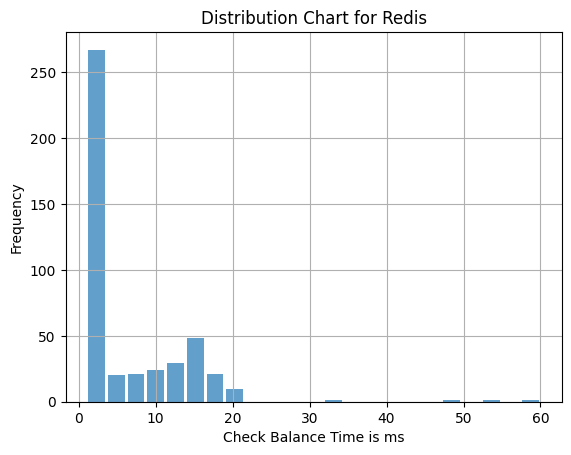

In [73]:
plot_distribution(finalResultsRedis, 'Redis')


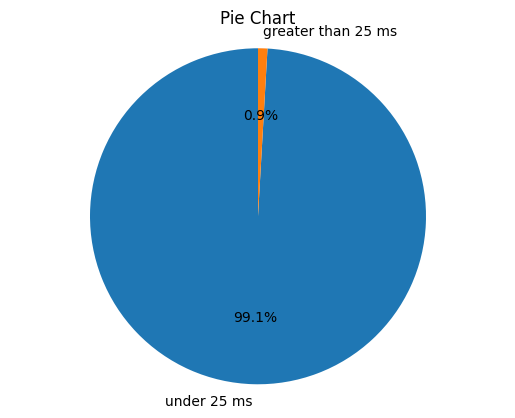

In [74]:
create_pie_chart(redisCountDict)

## Ran the below block about 10-20 times, with a 5 sec break in between to avoid being rate limited

In [52]:


requests.post(memcachedResetUrl)

with concurrent.futures.ThreadPoolExecutor() as executor:
    results = [executor.submit(testIt, memcachedChargeUrl, memcachedResetUrl) for _ in range(250)]

    for res in concurrent.futures.as_completed(results):
        finalResultsMemcached.append(res.result())

[140.271417, 140.198639, 190.526283, 159.706262, 120.538352, 120.517645, 210.965279, 180.011172, 11.892179, 179.555169, 199.184163, 1.856248, 1.836117, 1.799121, 1.638804, 1.854203, 2.130382, 80.29382, 1.709561, 60.878717, 80.559149, 180.315181, 1.759202, 1.642406, 1.717978, 120.031555, 140.668255, 1.183717, 1.526047, 8.554831, 1.618516, 1.761653, 1.02027, 1.89822, 1.739901, 93.029273, 60.138344, 1.8344, 1.763996, 1.767838, 1.669895, 60.747349, 9.115683, 1.936048, 1.603835, 1.551639, 1.646936, 1.099309, 1.051194, 1.808716, 1.080611, 1.761036, 1.804721, 1.803819, 1.767657, 1.539239, 1.908726, 1.604209, 1.879965, 1.823139, 1.613434, 1.899008, 1.754535, 1.04903, 1.850308, 0.936434, 1.142667, 1.115402, 1.079789, 0.96297, 1.786195, 1.863625, 1.492687, 1.10832, 1.712412, 1.116019, 1.670033, 1.654123, 1.680078, 1.749192, 1.646836, 1.007075, 1.733982, 1.545542, 1.672166, 1.649864, 3.496384, 1.865367, 1.032355, 4.928223, 1.803319, 0.952878, 0.996455, 1.834118, 1.672124, 1.029513, 1.802658, 1.00

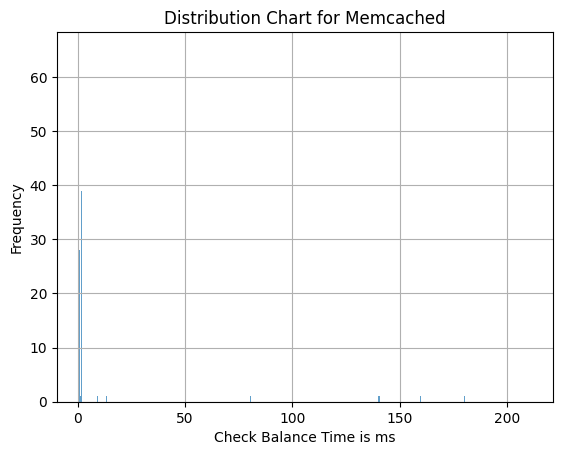

In [53]:
finalResultsMemcached = [res for res in finalResultsMemcached if res is not None]
print(finalResultsMemcached)

print(sum(finalResultsMemcached)/len(finalResultsMemcached))


plot_distribution(finalResultsMemcached, 'Memcached')